Revenue Prediction
==================
In this project the goal is to predict movies revenue using their features. revenue is given by ( box_office - budget ) so the main goal is to predict box office.

1. Prepare and preprocess the given data.

2. After exploring data find, select and especially create new features. ignore others.

3. Prepare features to feed the model.

4. Select and try different models.

5. Document and report each step using relative plots and a brief explanation. finally report the best suited model and justify why did it performed well.



- Keep in mind that in this task accuracy itself only has only part of score.

- Hint: to create new features you can use credit attributes. Think of it this way, what affects box office?  

**Tools**

importing useful tools and libraries. you may use any other library as well.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Modelling
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [2]:
np.random.seed(101)

In [3]:
# Your project struct must look like this,


# |── Name_SID.zip
# │   ├── data
# │   │       ├── rotten_tomatoes_5000_movies.csv
# │   │       ├── rotten_tomatoes_5000_movies.csv
# │   ├── *.ipynb
# │   ├── document.pdf

df_movies = pd.read_csv(r"rotten_tomatoes_5000_movies.csv")
df_credit = pd.read_csv(r"rotten_tomatoes_5000_credits.csv")


In [4]:
df_movies = df_movies[df_movies['rt_box_office']!=0]
y = df_movies['rt_box_office']
X = df_movies.drop(columns='rt_box_office')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3376 entries, 0 to 4798
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rt_production_budget     3376 non-null   int64  
 1   rt_genres                3376 non-null   object 
 2   rt_website               1396 non-null   object 
 3   rt_movie_id              3376 non-null   int64  
 4   rt_keywords              3376 non-null   object 
 5   rt_original_language     3376 non-null   object 
 6   rt_original_title        3376 non-null   object 
 7   rt_synopsis              3376 non-null   object 
 8   rt_audience_score        3376 non-null   float64
 9   rt_studios               3376 non-null   object 
 10  rt_production_countries  3376 non-null   object 
 11  rt_release_date          3376 non-null   object 
 12  rt_box_office            3376 non-null   int64  
 13  rt_runtime               3376 non-null   float64
 14  rt_languages             3376

In [ ]:
df_credit.head()

,rt_movie_id,rt_title,rt_actors,rt_staff
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


 متوسط هزینه تولید فیلم‌ها در هر ژانر چقدر است؟



In [5]:
import pandas as pd
import ast

df_movies = pd.read_csv("rotten_tomatoes_5000_movies.csv")


def clean_genre(genre):
    try:
        genre_list = ast.literal_eval(genre)
        if isinstance(genre_list, list) and len(genre_list) > 0:
            return genre_list[0]["name"]
    except:
        return None

df_movies['clean_genres'] = df_movies['rt_genres'].apply(clean_genre)


df_cleaned = df_movies.dropna(subset=['clean_genres'])


genre_budget_avg = df_cleaned.groupby('clean_genres')['rt_production_budget'].mean().sort_values(ascending=False)


print(genre_budget_avg.to_string())




clean_genres
Animation          6.760189e+07
Adventure          6.559832e+07
Fantasy            5.253879e+07
Science Fiction    4.927585e+07
Action             4.765133e+07
Family             4.269425e+07
War                3.655208e+07
Thriller           2.469809e+07
History            2.440340e+07
Western            2.318236e+07
Mystery            2.237390e+07
Crime              2.163398e+07
Romance            2.053943e+07
Comedy             1.883704e+07
Drama              1.797940e+07
Music              1.551357e+07
Horror             1.166398e+07
Documentary        1.957465e+06
TV Movie           2.500000e+05
Foreign            1.125000e+05


# سهم هر کشور در مجموع هزینه تولید فیلم‌ها در هر ژانر

In [6]:
import pandas as pd
import ast


def clean_genre(genre):
    try:
        genre_list = ast.literal_eval(genre)
        if isinstance(genre_list, list) and len(genre_list) > 0:
            return genre_list[0]["name"]
    except:
        return None

df_movies['clean_genres'] = df_movies['rt_genres'].apply(clean_genre)

df_cleaned = df_movies.dropna(subset=['clean_genres'])

df_cleaned['rt_production_countries'] = df_cleaned['rt_production_countries'].astype(str).str.split(', ')

df_exploded = df_cleaned.explode('rt_production_countries')

country_genre_budget = df_exploded.groupby(['clean_genres', 'rt_production_countries'])['rt_production_budget'].sum()

total_genre_budget = df_exploded.groupby('clean_genres')['rt_production_budget'].sum()

country_genre_share = (country_genre_budget / total_genre_budget) * 100

print(country_genre_share.unstack().fillna(0).round(2).to_string())





<ipython-input-6-264ab9da5ce0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['rt_production_countries'] = df_cleaned['rt_production_countries'].astype(str).str.split(', ')


rt_production_countries  "name": "Afghanistan"}  "name": "Angola"}]  "name": "Argentina"}  "name": "Argentina"}]  "name": "Aruba"}  "name": "Australia"}  "name": "Australia"}]  "name": "Austria"}  "name": "Bahamas"}  "name": "Belgium"}  "name": "Belgium"}]  "name": "Bhutan"}  "name": "Bolivia"}  "name": "Bosnia and Herzegovina"}  "name": "Brazil"}  "name": "Brazil"}]  "name": "Bulgaria"}  "name": "Bulgaria"}]  "name": "Cambodia"}]  "name": "Cameroon"}  "name": "Canada"}  "name": "Canada"}]  "name": "Chile"}  "name": "Chile"}]  "name": "China"}  "name": "China"}]  "name": "Colombia"}  "name": "Colombia"}]  "name": "Cyprus"}  "name": "Czech Republic"}  "name": "Czech Republic"}]  "name": "Denmark"}  "name": "Denmark"}]  "name": "Dominica"}]  "name": "Dominican Republic"}]  "name": "Ecuador"}  "name": "Egypt"}]  "name": "Fiji"}]  "name": "Finland"}  "name": "France"}  "name": "France"}]  "name": "Germany"}  "name": "Germany"}]  "name": "Greece"}  "name": "Greece"}]  "name": "Guadaloupe"} 

 تعداد فیلم‌های ساخته‌شده در سه ژانر برتر طی 10 سال گذشته را مقایسه کنید.

In [ ]:
import pandas as pd
import ast
from tabulate import tabulate

def clean_genre(genre):
    try:
        genre_list = ast.literal_eval(genre)
        if isinstance(genre_list, list) and len(genre_list) > 0:
            return genre_list[0]["name"]
    except:
        return None

df_movies['clean_genres'] = df_movies['rt_genres'].apply(clean_genre)
df_cleaned = df_movies.dropna(subset=['clean_genres'])

top_genres = df_cleaned['clean_genres'].value_counts().head(3).index.tolist()
df_cleaned['release_year'] = pd.to_datetime(df_cleaned['rt_release_date'], errors='coerce').dt.year
recent_movies = df_cleaned[df_cleaned['release_year'] >= (df_cleaned['release_year'].max() - 9)]

genre_year_counts = recent_movies[recent_movies['clean_genres'].isin(top_genres)].groupby(['release_year', 'clean_genres']).size().unstack()
print(tabulate(genre_year_counts.fillna(0).astype(int), headers='keys', tablefmt='grid'))




+----------------+----------+----------+---------+
|   release_year |   Action |   Comedy |   Drama |
+================+==========+==========+=========+
|           2008 |       32 |       52 |      67 |
+----------------+----------+----------+---------+
|           2009 |       34 |       60 |      69 |
+----------------+----------+----------+---------+
|           2010 |       29 |       58 |      65 |
+----------------+----------+----------+---------+
|           2011 |       34 |       43 |      66 |
+----------------+----------+----------+---------+
|           2012 |       30 |       46 |      42 |
+----------------+----------+----------+---------+
|           2013 |       40 |       49 |      49 |
+----------------+----------+----------+---------+
|           2014 |       29 |       32 |      55 |
+----------------+----------+----------+---------+
|           2015 |       30 |       25 |      44 |
+----------------+----------+----------+---------+
|           2016 |       32 |  

<ipython-input-82-486fee98e70c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['release_year'] = pd.to_datetime(df_cleaned['rt_release_date'], errors='coerce').dt.year


محاسبه میانگین طول فیلم‌ها در هر کشور

In [ ]:
import pandas as pd
import ast

def clean_genre(genre):
    try:
        genre_list = ast.literal_eval(genre)
        if isinstance(genre_list, list) and len(genre_list) > 0:
            return genre_list[0]["name"]
    except:
        return None


df_movies['clean_genres'] = df_movies['rt_genres'].apply(clean_genre)
df_cleaned = df_movies.dropna(subset=['clean_genres'])

df_movies['rt_production_countries'] = df_movies['rt_production_countries'].str.split(', ')
df_exploded_countries = df_movies.explode('rt_production_countries')


country_runtime_avg = df_exploded_countries.groupby('rt_production_countries')['rt_runtime'].mean()

max_runtime_country = country_runtime_avg.idxmax()
min_runtime_country = country_runtime_avg.idxmin()

max_runtime_value = country_runtime_avg.max()
min_runtime_value = country_runtime_avg.min()

print(f"کشور با طولانی‌ترین فیلم‌ها: {max_runtime_country} با میانگین {max_runtime_value} دقیقه")
print(f"کشور با کوتاه‌ترین فیلم‌ها: {min_runtime_country} با میانگین {min_runtime_value} دقیقه")


کشور با طولانی‌ترین فیلم‌ها: "name": "Libyan Arab Jamahiriya"} با میانگین 173.0 دقیقه
کشور با کوتاه‌ترین فیلم‌ها: "name": "Pakistan"}] با میانگین 0.0 دقیقه


پر تکرارترین زبان‌ها (به غیر از انگلیسی)

In [ ]:
import pandas as pd
import ast

df_movies = pd.read_csv("rotten_tomatoes_5000_movies.csv")

def extract_languages(lang):
    try:
        lang_list = ast.literal_eval(lang)
        if isinstance(lang_list, list):
            return [l["name"] for l in lang_list if "name" in l]
    except:
        return []

df_movies['clean_languages'] = df_movies['rt_languages'].apply(extract_languages)

df_exploded_languages = df_movies.explode('clean_languages')

df_exploded_languages = df_exploded_languages[df_exploded_languages['clean_languages'] != 'English']

language_counts = df_exploded_languages['clean_languages'].value_counts()

print(language_counts.head(10).to_string())



clean_languages
Français     437
Español      351
Deutsch      262
Italiano     188
Pусский      185
普通话          107
日本語           97
Português     68
العربية       67
              54


هزینه‌ی متوسط سالانه‌ی صنعت فیلم‌سازی آمریکا در ۱۰ سال گذشته،

In [7]:
import pandas as pd

df_movies = pd.read_csv("rotten_tomatoes_5000_movies.csv")

df_movies['release_year'] = pd.to_datetime(df_movies['rt_release_date'], errors='coerce').dt.year

current_year = pd.to_datetime("today").year
df_movies_recent = df_movies[df_movies['release_year'] >= (current_year - 10)]

df_movies_recent['rt_production_countries'] = df_movies_recent['rt_production_countries'].apply(lambda x: eval(x) if isinstance(x, str) else [])
df_movies_recent['is_usa'] = df_movies_recent['rt_production_countries'].apply(lambda x: any(country.get('iso_3166_1') == 'US' for country in x))

df_usa_movies = df_movies_recent[df_movies_recent['is_usa']]

df_usa_movies_grouped = df_usa_movies.groupby('release_year')['rt_production_budget'].sum()

print(df_usa_movies_grouped)


release_year
2015.0    6332175004
2016.0    4631400000
Name: rt_production_budget, dtype: int64


<ipython-input-7-6f5b9c214693>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies_recent['rt_production_countries'] = df_movies_recent['rt_production_countries'].apply(lambda x: eval(x) if isinstance(x, str) else [])
<ipython-input-7-6f5b9c214693>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies_recent['is_usa'] = df_movies_recent['rt_production_countries'].apply(lambda x: any(country.get('iso_3166_1') == 'US' for country in x))


 مقایسه هزینه‌های تولید فیلم در آمریکا و سایر کشورها در 10 سال گذشته



In [8]:
import pandas as pd

df_movies = pd.read_csv("rotten_tomatoes_5000_movies.csv")

df_movies['release_year'] = pd.to_datetime(df_movies['rt_release_date'], errors='coerce').dt.year

current_year = pd.to_datetime("today").year
df_movies_recent = df_movies[df_movies['release_year'] >= (current_year - 10)]

df_movies_recent['rt_production_countries'] = df_movies_recent['rt_production_countries'].apply(lambda x: eval(x) if isinstance(x, str) else [])
df_movies_recent['country_list'] = df_movies_recent['rt_production_countries'].apply(lambda x: [country.get('name') for country in x])

df_exploded_countries = df_movies_recent.explode('country_list')

df_exploded_countries['rt_production_budget'] = pd.to_numeric(df_exploded_countries['rt_production_budget'], errors='coerce')

df_valid_data = df_exploded_countries.dropna(subset=['country_list', 'rt_production_budget'])

country_year_budget = df_valid_data.groupby(['release_year', 'country_list'])['rt_production_budget'].sum().unstack().fillna(0)

country_year_budget = country_year_budget.sort_index(axis=1, ascending=False)
print(country_year_budget)



country_list  United States of America  United Kingdom       Taiwan  \
release_year                                                          
2015.0                    6.332175e+09     725522362.0  150000000.0   
2016.0                    4.631400e+09     903500000.0          0.0   

country_list  Switzerland       Spain  South Korea  South Africa  Slovenia  \
release_year                                                                 
2015.0          4000000.0  61800000.0          0.0    49000000.0       0.0   
2016.0                0.0         0.0          0.0           0.0       0.0   

country_list      Russia     Romania  ...  Czech Republic        China  \
release_year                          ...                                
2015.0        30000000.0  50000000.0  ...      50000000.0  360000000.0   
2016.0               0.0         0.0  ...             0.0  728490000.0   

country_list       Chile       Canada  Cambodia    Bulgaria  Brazil  \
release_year                      

<ipython-input-8-0498ad6e58be>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies_recent['rt_production_countries'] = df_movies_recent['rt_production_countries'].apply(lambda x: eval(x) if isinstance(x, str) else [])
<ipython-input-8-0498ad6e58be>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies_recent['country_list'] = df_movies_recent['rt_production_countries'].apply(lambda x: [country.get('name') for country in x])


فیلم‌های Johnny Depp

In [9]:
import pandas as pd
import ast

df_movies = pd.read_csv(r"rotten_tomatoes_5000_movies.csv")
df_credit = pd.read_csv(r"rotten_tomatoes_5000_credits.csv")

def is_johnny_depp(actors):
    try:
        actor_list = ast.literal_eval(actors)
        for actor in actor_list:
            if 'Johnny Depp' in actor['name']:
                return True
    except Exception as e:
        return False
    return False

df_credit['is_johnny_depp'] = df_credit['rt_actors'].apply(is_johnny_depp)

johnny_depp_movies = df_credit[df_credit['is_johnny_depp']]

print(johnny_depp_movies[['rt_movie_id', 'rt_title']])



      rt_movie_id                                           rt_title
1             285           Pirates of the Caribbean: At World's End
12             58         Pirates of the Caribbean: Dead Man's Chest
13          57201                                    The Lone Ranger
17           1865        Pirates of the Caribbean: On Stranger Tides
32          12155                                Alice in Wonderland
105        241259                    Alice Through the Looking Glass
117           118                  Charlie and the Chocolate Factory
133         62213                                       Dark Shadows
178         44896                                              Rango
199            22  Pirates of the Caribbean: The Curse of the Bla...
280         11322                                     Public Enemies
295         37710                                        The Tourist
333        157353                                      Transcendence
499         71880                 

** میانگین درصد بازیگران مرد و زن در کل فیلم‌ها**

In [10]:
import pandas as pd
import json

df_movies = pd.read_csv(r"rotten_tomatoes_5000_movies.csv")
df_credit = pd.read_csv(r"rotten_tomatoes_5000_credits.csv")

df_credit['rt_actors'] = df_credit['rt_actors'].apply(json.loads)

def get_gender_counts(actor_list):
    male = 0
    female = 0
    for actor in actor_list[:5]:
        if actor.get('gender') == 2:
            male += 1
        elif actor.get('gender') == 1:
            female += 1
    return male, female

df_credit['gender_counts'] = df_credit['rt_actors'].apply(get_gender_counts)
df_credit['male_percentage'] = df_credit['gender_counts'].apply(lambda x: (x[0] / sum(x)) * 100 if sum(x) > 0 else 0)
df_credit['female_percentage'] = df_credit['gender_counts'].apply(lambda x: (x[1] / sum(x)) * 100 if sum(x) > 0 else 0)

result = df_credit[['rt_title', 'male_percentage', 'female_percentage']]
print(result.head())



                                   rt_title  male_percentage  \
0                                    Avatar             40.0   
1  Pirates of the Caribbean: At World's End             80.0   
2                                   Spectre             60.0   
3                     The Dark Knight Rises             80.0   
4                               John Carter             60.0   

   female_percentage  
0               60.0  
1               20.0  
2               40.0  
3               20.0  
4               40.0  


محبوب ترین ژانر در 10 سال گذشته به چه ترتیب بوده است؟

🎬 محبوب‌ترین ژانرها بر اساس تعداد نقدها:
Action: 268759 نقد
Adventure: 246837 نقد
Drama: 207318 نقد
Science Fiction: 183874 نقد
Thriller: 159361 نقد
Comedy: 142464 نقد
Fantasy: 79216 نقد
Crime: 62928 نقد
Family: 61389 نقد
Mystery: 46156 نقد

🌟 محبوب‌ترین ژانرها بر اساس میانگین امتیاز منتقدان:
War: 6.79 امتیاز
History: 6.51 امتیاز
Adventure: 6.29 امتیاز
Fantasy: 6.25 امتیاز
Romance: 6.25 امتیاز
Animation: 6.24 امتیاز
Family: 6.10 امتیاز
Music: 5.98 امتیاز
Drama: 5.97 امتیاز
Science Fiction: 5.97 امتیاز


<ipython-input-11-ddae6d334e3b>:54: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-ddae6d334e3b>:54: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


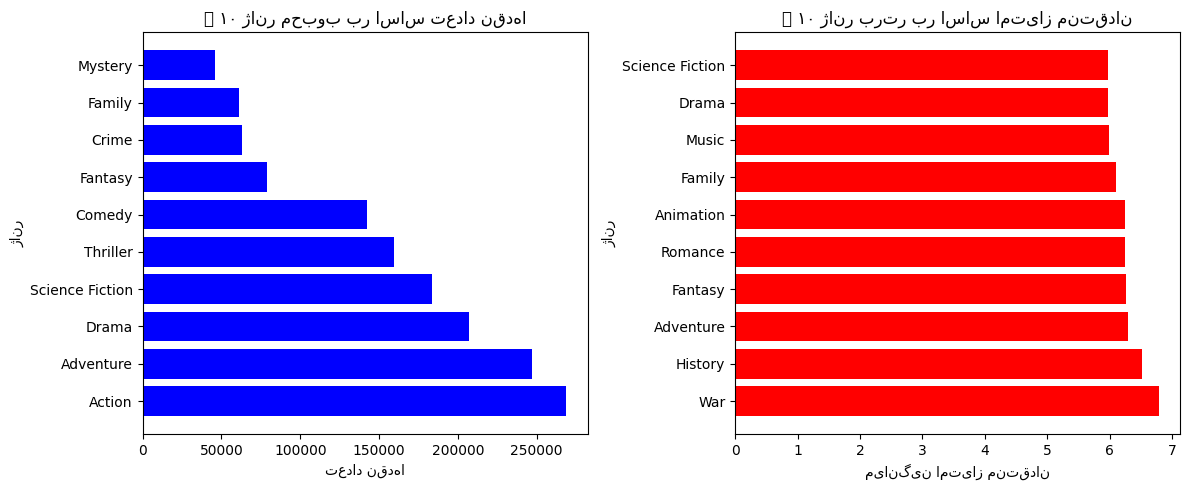

In [11]:
import pandas as pd
import json
from collections import defaultdict
import matplotlib.pyplot as plt

df_movies = pd.read_csv("rotten_tomatoes_5000_movies.csv")

df_movies["rt_release_year"] = pd.to_datetime(df_movies["rt_release_date"], errors="coerce").dt.year

recent_movies = df_movies[df_movies["rt_release_year"] >= 2014]

genre_counts_review = defaultdict(int)
genre_scores = defaultdict(list)

for genres_str, review_count, critics_score in zip(recent_movies["rt_genres"],
                                                    recent_movies["rt_review_count"],
                                                    recent_movies["rt_critics_score"]):
    try:
        genres = json.loads(genres_str)
        for genre in genres:
            genre_name = genre["name"]
            genre_counts_review[genre_name] += review_count
            genre_scores[genre_name].append(critics_score)
    except:
        continue

sorted_by_review = sorted(genre_counts_review.items(), key=lambda x: x[1], reverse=True)

avg_critics_score = {genre: sum(scores) / len(scores) for genre, scores in genre_scores.items()}
sorted_by_critics = sorted(avg_critics_score.items(), key=lambda x: x[1], reverse=True)

print("🎬 محبوب‌ترین ژانرها بر اساس تعداد نقدها:")
for genre, count in sorted_by_review[:10]:
    print(f"{genre}: {count} نقد")

print("\n🌟 محبوب‌ترین ژانرها بر اساس میانگین امتیاز منتقدان:")
for genre, score in sorted_by_critics[:10]:
    print(f"{genre}: {score:.2f} امتیاز")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.barh([genre for genre, _ in sorted_by_review[:10]], [count for _, count in sorted_by_review[:10]], color="blue")
plt.xlabel("تعداد نقدها")
plt.ylabel("ژانر")
plt.title("🎬 ۱۰ ژانر محبوب بر اساس تعداد نقدها")

plt.subplot(1, 2, 2)
plt.barh([genre for genre, _ in sorted_by_critics[:10]], [score for _, score in sorted_by_critics[:10]], color="red")
plt.xlabel("میانگین امتیاز منتقدان")
plt.ylabel("ژانر")
plt.title("🌟 ۱۰ ژانر برتر بر اساس امتیاز منتقدان")

plt.tight_layout()
plt.show()


پیشبینی درآمد فیلمها با استفاده از مدل های یادگیری ماشین

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import ast

df_movies = pd.read_csv(r"rotten_tomatoes_5000_movies.csv")
df_credit = pd.read_csv(r"rotten_tomatoes_5000_credits.csv")

df_movies['rt_tagline'] = df_movies['rt_tagline'].fillna('No tagline')

df_movies['rt_release_date'] = pd.to_datetime(df_movies['rt_release_date'], errors='coerce')

df_movies['release_year'] = df_movies['rt_release_date'].dt.year
df_movies['release_month'] = df_movies['rt_release_date'].dt.month

df_movies['rt_website'] = df_movies['rt_website'].fillna('No Website')

df_movies['rt_website'] = df_movies['rt_website'].fillna('Unknown')

df_movies = df_movies[df_movies['rt_box_office'] > 0]


In [ ]:
df_credit['rt_actors'] = df_credit['rt_actors'].apply(ast.literal_eval)
df_credit['rt_staff'] = df_credit['rt_staff'].apply(ast.literal_eval)

df_credit['num_actors'] = df_credit['rt_actors'].apply(lambda x: len(x))

df_credit['directors'] = df_credit['rt_staff'].apply(lambda x: [staff['name'] for staff in x if staff['job'] == 'Director'])

famous_actors = set(["Tom Hanks", "Will Smith", "Leonardo DiCaprio", "Brad Pitt"])  # example set of famous actors
df_credit['has_famous_actor'] = df_credit['rt_actors'].apply(lambda x: any(actor['name'] in famous_actors for actor in x))

df = pd.merge(df_movies, df_credit[['rt_movie_id', 'num_actors', 'directors', 'has_famous_actor']], on='rt_movie_id', how='left')


In [ ]:
df_genres = df['rt_genres'].str.get_dummies(sep=',')
df = pd.concat([df, df_genres], axis=1)

df_studios = df['rt_studios'].str.get_dummies(sep=',')
df = pd.concat([df, df_studios], axis=1)


In [ ]:
features = ['rt_production_budget', 'rt_runtime', 'rt_audience_score', 'rt_critics_score', 'rt_review_count',
            'release_year', 'release_month', 'num_actors', 'has_famous_actor'] + list(df_genres.columns) + list(df_studios.columns)

X = df[features]
y = df['rt_box_office']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


In [ ]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R2: {r2_lr}")
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R2: {r2_rf}")


Linear Regression MSE: 2.8448367690923548e+16
Linear Regression R2: 0.4488498868873283
Random Forest MSE: 1.404030956351029e+16
Random Forest R2: 0.7279872684387958


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

df_movies = pd.read_csv(r"rotten_tomatoes_5000_movies.csv")
df_credit = pd.read_csv(r"rotten_tomatoes_5000_credits.csv")


df_movies['rt_tagline'].fillna('', inplace=True)
df_movies['rt_website'].fillna('', inplace=True)

df_movies['rt_box_office'] = df_movies['rt_box_office'].replace(0, np.nan)
df_movies['rt_production_budget'] = df_movies['rt_production_budget'].replace(0, np.nan)

def famous_actor_in_movie(row):
    famous_actors = ['Tom Hanks', 'Leonardo DiCaprio', 'Brad Pitt', 'Scarlett Johansson', 'Robert Downey Jr.']
    for actor in famous_actors:
        if actor in row['rt_actors']:
            return 1
    return 0

df_credit['rt_actors'] = df_credit['rt_actors'].apply(lambda x: str(x))
df_movies['famous_actor'] = df_credit.apply(famous_actor_in_movie, axis=1)

def known_director_in_movie(row):
    known_directors = ['Steven Spielberg', 'Martin Scorsese', 'Christopher Nolan', 'Quentin Tarantino', 'Ridley Scott']
    for director in known_directors:
        if director in row['rt_staff']:
            return 1
    return 0

df_credit['rt_staff'] = df_credit['rt_staff'].apply(lambda x: str(x))
df_movies['known_director'] = df_credit.apply(known_director_in_movie, axis=1)

df_movies['rt_genres_count'] = df_movies['rt_genres'].apply(lambda x: len(x.split(',')))

df_movies['rt_release_date'] = pd.to_datetime(df_movies['rt_release_date'], errors='coerce')
df_movies['release_year'] = df_movies['rt_release_date'].dt.year

le = LabelEncoder()
df_movies['rt_original_language'] = le.fit_transform(df_movies['rt_original_language'])
df_movies['rt_release_status'] = le.fit_transform(df_movies['rt_release_status'])

features = ['rt_production_budget', 'rt_audience_score', 'rt_runtime', 'famous_actor', 'known_director', 'rt_genres_count', 'release_year', 'rt_original_language', 'rt_release_status']


<ipython-input-132-bede05579560>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_movies['rt_tagline'].fillna('', inplace=True)
<ipython-input-132-bede05579560>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

Linear Regression - MSE: 2.2254319573331184e+16, R2: 0.5597145727962514
Decision Tree - MSE: 2.737984185652545e+16, R2: 0.45830986524442563
Random Forest - MSE: 1.7774257814593326e+16, R2: 0.648349316215181
Best Random Forest (GridSearch) - MSE: 1.7774609056418642e+16, R2: 0.6483423671527035


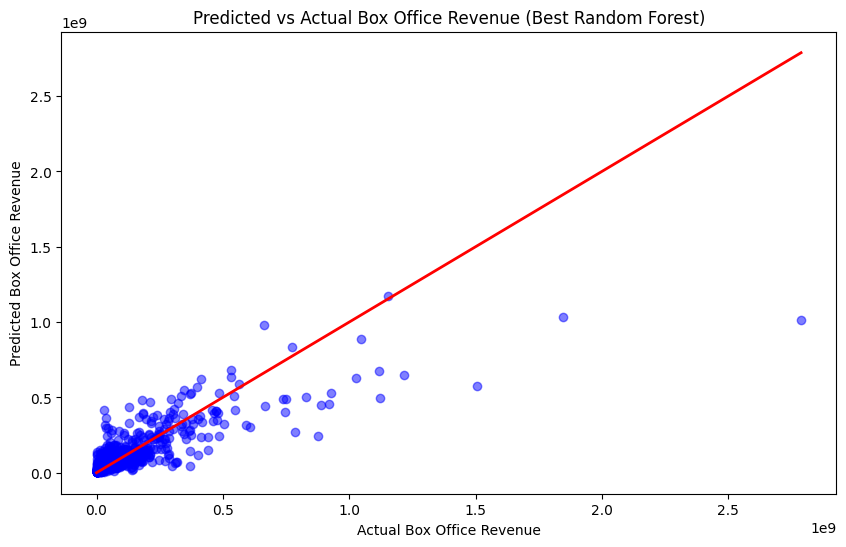

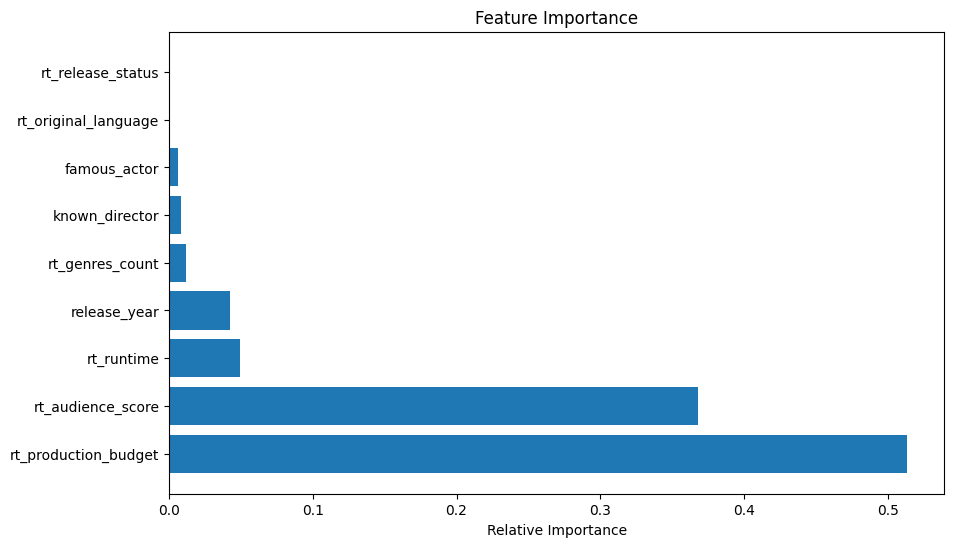

In [ ]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

y_pred_best_rf = best_rf.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Linear Regression - MSE: {mse_lr}, R2: {r2_lr}")
print(f"Decision Tree - MSE: {mse_dt}, R2: {r2_dt}")
print(f"Random Forest - MSE: {mse_rf}, R2: {r2_rf}")
print(f"Best Random Forest (GridSearch) - MSE: {mse_best_rf}, R2: {r2_best_rf}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf, color='blue', alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linewidth=2)
plt.title('Predicted vs Actual Box Office Revenue (Best Random Forest)')
plt.xlabel('Actual Box Office Revenue')
plt.ylabel('Predicted Box Office Revenue')
plt.show()

importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
features_sorted = [features[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(features_sorted)), importances[indices], align="center")
plt.yticks(range(len(features_sorted)), features_sorted)
plt.xlabel("Relative Importance")
plt.show()
